Exploratory Data Analysis and Visualization:

Here I will load the libraries required to read and manipulate data using R

In [18]:
library(repr)
library(tidyverse)
library(dplyr)

Here I will use the read_csv function to read the the datasets "players.csv" and "sessions.csv" in which data are seperated by commas and assign the reading of these data sets to the objects players_raw and sessions_raw respectively. Then I will display the first 5 rows of the raw, pre-wrangled data sets with the function "head".

In [41]:
players_raw <- read_csv("https://raw.githubusercontent.com/Loganshea/Individual-Project/refs/heads/main/players.csv")
sessions_raw <- read_csv("https://raw.githubusercontent.com/Loganshea/Individual-Project/refs/heads/main/sessions.csv")
head(players_raw,5)
head(sessions_raw,5)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12


Because the raw "players.csv" data set is already tidy, the raw "sessions.csv" data set is the only data that must be altered in order for it to be easily used for other tasks. In both the start_time and end_time colums, there are values for both the date and time of the respective start of session or end of session instances. These dates should be in seperate colums than the times for both the start and end of sessions so that each cell has only one value. I will use the "seperate" function to do this for both colums, and assign both the tidy sessions and players data sets to objects "sessions_tidy" and "players_tidy" respectively.

In [40]:
sessions_tidy <- sessions_raw |>
    separate(col = start_time, 
            into = c("start_date" , "start_time"),
            sep = " "
            ) |>
    separate(col = end_time, 
            into = c("end_date" , "end_time"), 
            sep = " "
            )
players_tidy <- players_raw

head(players_tidy,5)
head(sessions_tidy,5)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,25/07/2024,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,25/05/2024,16:12,1.71665e+12,1.71665e+12


Now, using the tidy data, I will compute the mean values for the "played_hours" and "age" colums in the "players_tidy" data set using the function "summerize". Because there are values entered as NA, and I want the function to skip these values and average all the others, I will follow the "mean" calculation with "na.rm = TRUE". 

In [25]:
players_mean <- players_tidy |>
    summarize(
        mean_played_hours = mean(played_hours, na.rm = TRUE),
        mean_age = mean(Age, na.rm = TRUE)
        )
players_mean

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


The resulting averages are as follows:
| Average Time Played (hours) | Average Age of Player (years)|
|---|---|
|5.86|20.5|

To explore how the data will help answer my specific question of wether age is a good gauge of how much  time a player will spend playing the game, I created this scatterplot to map the two variables side by side.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


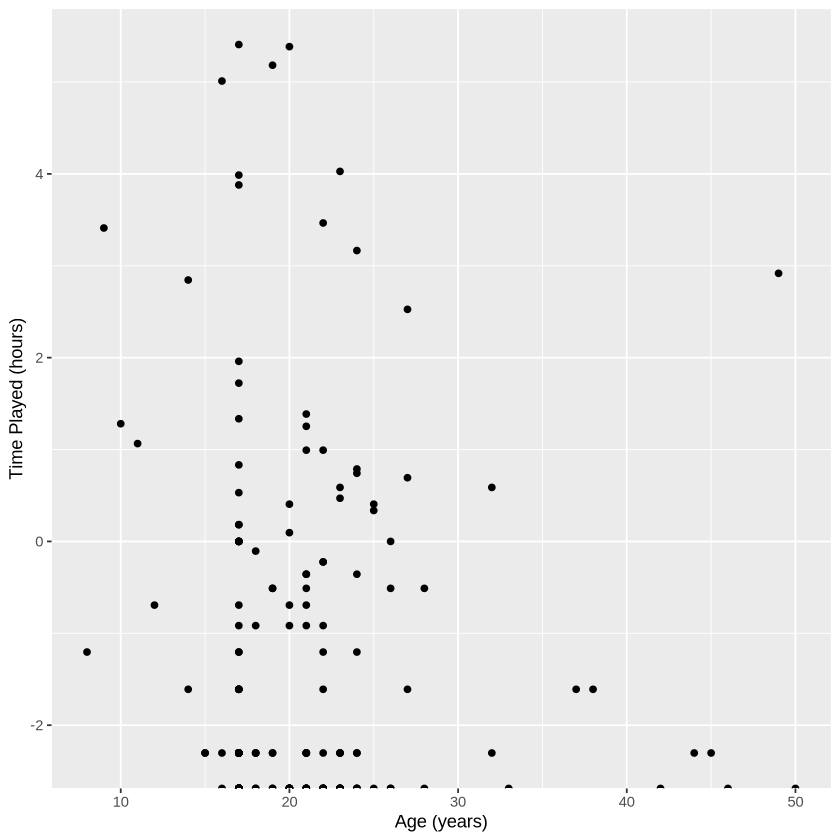

In [32]:
hours_vs_age_scatterplot <- players_tidy |>
    mutate(played_hours = log(played_hours)) |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point() +
    labs(x = "Age (years)", y = "Time Played (hours)")

hours_vs_age_scatterplot

Data Description:


Questions:


Methods and Plan:
